## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from scipy import stats
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (15, 8)

In [2]:
#Reading the data from the file.
df_raw=pd.read_csv("C:\\Users\\vikra\\Desktop\\GREAT LEARNING\\class_learning\\capstone\\datasets\\vikrant\\vehicles.csv")
df_raw.sample()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
50479,7311771924,https://reno.craigslist.org/ctd/d/atlanta-2019...,reno / tahoe,https://reno.craigslist.org,21590,2019.0,hyundai,ioniq plug-in hybrid,good,NaN,other,13204.0,clean,other,KMHC65LDXKU135923,fwd,NaN,hatchback,NaN,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-24T04:12:55-0700


### Inference 
the data is read successfully

In [3]:
df_raw.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Inference 
all column is shown successfull

In [4]:
df_raw.select_dtypes(include=object).head()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
0,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


### Inference 
first 5 rows displayed

In [5]:
df_raw.select_dtypes(include=np.number).head()

,id,price,year,odometer,county,lat,long
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN


### Inference 
numeric columns are selected and first 5 row are displayed

In [6]:
#copying orignal dataframe to make orignal dataframe as it is
df=df_raw.copy()

### Inference 
making copy for analysis and make sure to remain orignal data as it is

In [7]:
#displaying all the columns in the data.
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


### Inference 
last 5 rows are displayed from new copy and from here we are performing all the opration on it 

In [8]:
#understanding the data types present in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### Inference 
information about all the columns like name, values, datatype are displayed

In [9]:
#understanding the shape of the data.
print('Total rows:',df.shape[0])
print('Total columns:',df.shape[1])

Total rows: 426880
Total columns: 26


In [10]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

### Inference 
id, url, region, region_url, price, state doesn't have null value 
remaining columns have null value

<AxesSubplot: >

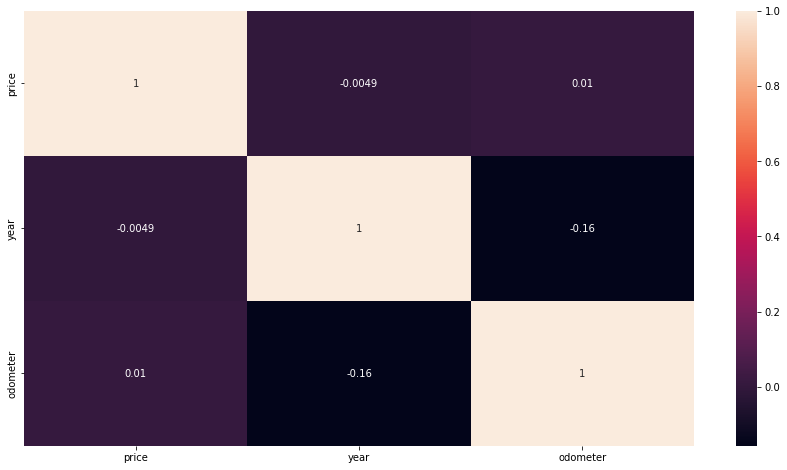

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df[['price','year','odometer']].corr(),annot=True)

### Inference 
there is very low relation between id,price,year,odometer column

In [12]:
#dropping the unncessary columns in the data.
df.drop(['id','description','url','region_url','image_url','county','VIN'],axis=1,inplace=True)

In [13]:
#Here we have dropped 6 columns and those are id,url,image_url,VIN,description 
#because values in these columns are unique and

# as all the rows information are extracted from description columns so there
#is no need to keep the description columns

#hence won't add any value to our analysis.Also we have dropped county since it is an empty column.
#We have stored the remaining columns in df.


In [14]:
print('Total rows:',df.shape[0])
print('Total columns:',df.shape[1])

Total rows: 426880
Total columns: 19


In [15]:
#Hence there are 426880 rows and 19 columns remaining in the dataset.

In [16]:
#Checking the duplicate rows in the data.
df[df.duplicated()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
11,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
12,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
13,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
14,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
20,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
21,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
22,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
23,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
141652,chicago,14949,2017.0,ford,escape s,excellent,4 cylinders,gas,84305.0,NaN,automatic,NaN,NaN,SUV,NaN,il,41.806344,-87.723149,2021-05-01T09:05:08-0500
159530,fort dodge,20900,2003.0,chevrolet,corvette,good,8 cylinders,gas,49446.0,clean,manual,fwd,mid-size,convertible,black,ia,42.189800,-91.775800,2021-04-24T10:10:33-0500


In [17]:
#checking the count of duplicate rows in the data.
df.duplicated().value_counts()

False    426843
True         37
dtype: int64

### here we can see that there are 37 rows which are duplicate hence we will drop these 37 rows.

In [18]:
df.drop_duplicates(keep='first',inplace=True)

In [19]:
#Checking the duplicate rows in the data.
df[df.duplicated()].shape

(0, 19)

### hence here we can see that there are no duplicate rows present in the dataset and hence we can proceed further.

In [20]:
#Checking the percentage of the null values in the dataset.
df.isnull().sum()/len(df)*100

region           0.000000
price            0.000000
year             0.279728
manufacturer     4.131496
model            1.233709
condition       40.783614
cylinders       41.620924
fuel             0.703303
odometer         1.028247
title_status     1.926001
transmission     0.596238
drive           30.585016
size            71.765731
type            21.752026
paint_color     30.498567
state            0.000000
lat              1.531711
long             1.531711
posting_date     0.013354
dtype: float64

### Inference 
size have 71% null value and we don't want to treate because if we treate the null
values in state column there are chanses to introduce biseness in that column

remaining all column which have null values we are going to treat them

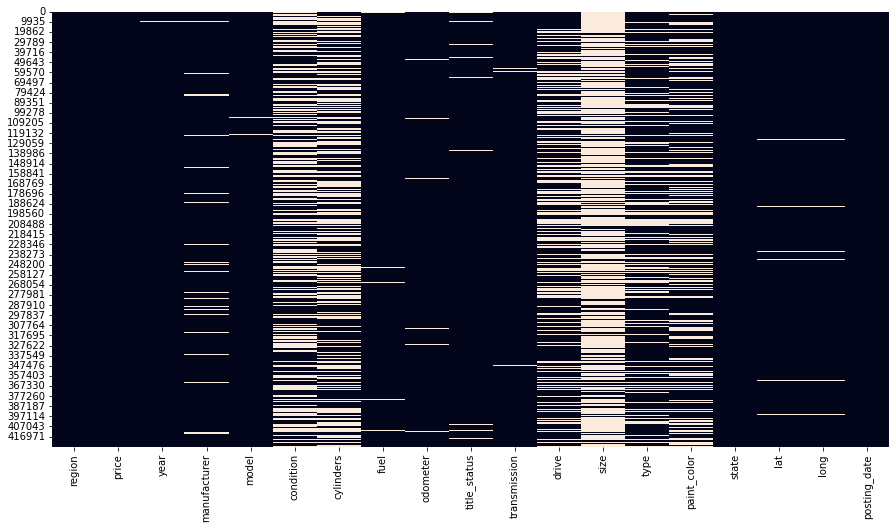

In [21]:
#visualizing the null values in the data
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

### Inference 
heatmap of null value in dataset the light color shows the null value in the dataset

In [22]:
#we are dropping size column as it contains more than 70% missing values.
df.drop('size',axis=1,inplace=True)

In [23]:
df.isnull().sum().sort_values(ascending = False)

cylinders       177656
condition       174082
drive           130550
paint_color     130181
type             92847
manufacturer     17635
title_status      8221
lat               6538
long              6538
model             5266
odometer          4389
fuel              3002
transmission      2545
year              1194
posting_date        57
state                0
price                0
region               0
dtype: int64

In [24]:
df.shape

(426843, 18)

## treating null value

In [25]:
df['title_status'].value_counts(normalize=True)*100

clean         96.770117
rebuilt        1.724467
salvage        0.923984
lien           0.339686
missing        0.194447
parts only     0.047298
Name: title_status, dtype: float64

In [26]:
df.drop('title_status',axis=1,inplace=True)

In [27]:
#considering the rows with only title status as clean because others dont add any value to our analysis
# so considering all values are cleane so it is good to drop the columns

In [28]:
df.drop('posting_date', axis = 1, inplace = True)
#as all dates are almost of same month and year hence no analysis can be done

In [29]:
df['fuel'].value_counts(normalize=True)*100

gas         84.037646
other        7.249653
diesel       7.092282
hybrid       1.219797
electric     0.400622
Name: fuel, dtype: float64

In [30]:
df['transmission'].value_counts(normalize=True)*100

automatic    79.307232
other        14.773108
manual        5.919660
Name: transmission, dtype: float64

In [31]:
df.dropna(subset=['fuel', 'transmission'], axis = 0, inplace = True)
# df.shape #as both the rows are 2000 and 2000 and it wont have any necessary impact on the data hence dropped

## Treating null values of condition and paint_color

In [32]:
df = df[df['manufacturer'].notnull()]
df.shape

(404976, 16)

In [33]:
df = df[df['model'].notnull()]
df.shape

(399784, 16)

In [34]:
df['condition'].fillna('not specified', inplace = True)
df['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'not specified',
       'salvage'], dtype=object)

In [35]:
df['paint_color'].fillna('unknown', inplace = True)
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'unknown',
       'brown', 'yellow', 'orange', 'green', 'custom', 'purple'],
      dtype=object)

### treating missing values of cylinder column


In [36]:
m1 = df['model'].tolist()
m1 = [x.lower().strip() for x in m1]
m2 = [y.split()[0] for y in m1]
m2 = [x.replace(' ', '').replace('-', '').replace('/', '') for x in m2]
df['car_model'] = m2
df['car_model'] = df['manufacturer'] + " " + df['car_model']
df['car_model'].nunique()

3473

In [37]:
df = df[df['cylinders'] != 'other']
dfa = df.copy()
dummy = df[df['cylinders'].notnull()].copy()

In [38]:
dummy['cylinders'] = [int(m.split()[0]) for m in dummy['cylinders']]

In [39]:
med = dummy.groupby('car_model')['cylinders'].median()

In [40]:
merged = pd.merge(dfa, med, on = 'car_model', how = 'left')

In [41]:
merged['cylinders_y']=merged['cylinders_y'].replace(np.nan,merged['cylinders_y'].median())
merged['cylinders_y'].isnull().sum()

0

In [42]:
df['cylinders']=merged['cylinders_y'].tolist()

In [43]:
df['cylinders'].isnull().sum()

0

In [44]:
df['cylinders']=df['cylinders'].astype('object')

## treating missing values of drive column

In [45]:
dfa = df.copy()
dummy = df[df['drive'].notnull()].copy()

In [46]:
mode=dummy.groupby('car_model')['drive'].agg(pd.Series.mode)
mode[:5]

car_model
acura 2002     fwd
acura 3.0cl    fwd
acura 3.2      fwd
acura 3.2tl    fwd
acura 3.5      fwd
Name: drive, dtype: object

In [47]:
mode.index

Index(['acura 2002', 'acura 3.0cl', 'acura 3.2', 'acura 3.2tl', 'acura 3.5',
       'acura 3.5rl', 'acura cl', 'acura ilx', 'acura integra', 'acura legend',
       ...
       'volvo vnm630', 'volvo vnm64t200', 'volvo wagon', 'volvo wia',
       'volvo xc', 'volvo xc40', 'volvo xc60', 'volvo xc70', 'volvo xc90',
       'volvo xc90t6'],
      dtype='object', name='car_model', length=2814)

In [48]:
for i in mode.index:
    if type(mode[i]) != str:
        mode[i] = mode[i][0]

In [49]:
merged = pd.merge(dfa, mode, on = 'car_model', how = 'left')
merged.shape

(398881, 18)

In [50]:
merged['drive_y']=merged['drive_y'].replace(np.nan,merged['drive_y'].mode()[0])

In [51]:
merged['drive_y'].isnull().sum()

0

In [52]:
df['drive']=merged['drive_y'].tolist()

In [53]:
df['drive'].isnull().sum()

0

## treating missing values of type column

In [54]:
dfa = df.copy()
dummy = df[df['type'].notnull()].copy()
mode = dummy.groupby('car_model')['type'].agg(pd.Series.mode)

In [55]:
for i in mode.index:
    if type(mode[i]) != str:
        mode[i] = mode[i][0]

In [56]:
merged = pd.merge(dfa, mode, on = 'car_model', how = 'left')
merged.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type_x,paint_color,state,lat,long,car_model,type_y
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,other,4wd,pickup,white,al,32.590,-85.4800,gmc sierra,pickup
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,other,4wd,pickup,blue,al,32.590,-85.4800,chevrolet silverado,pickup
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8.0,gas,19160.0,other,4wd,pickup,red,al,32.590,-85.4800,chevrolet silverado,pickup
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8.0,gas,41124.0,other,4wd,pickup,red,al,32.590,-85.4800,toyota tundra,pickup
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,automatic,4wd,truck,black,al,32.592,-85.5189,ford f150,pickup


In [57]:
merged['type_y'].isnull().sum()

929

In [58]:
merged['type_y']=merged['type_y'].replace(np.nan,merged['type_y'].mode()[0])

In [59]:
df['type']=merged['type_y'].tolist()

In [60]:
df['type'].isnull().sum()

0

## treating missing values of odometer column

In [61]:
dfa = df.copy()
dummy = df[df['odometer'].notnull()].copy()

In [62]:
med = dummy.groupby('car_model')['odometer'].median()
med

car_model
acura 2002       95861.0
acura 3.0cl     220000.0
acura 3.2       152147.5
acura 3.2tl     155690.0
acura 3.5       205000.0
                  ...   
volvo xc40       25209.0
volvo xc60       61243.0
volvo xc70      138170.0
volvo xc90      111575.0
volvo xc90t6     24733.0
Name: odometer, Length: 3448, dtype: float64

In [63]:
merged=pd.merge(dfa,med,on='car_model',how='left')
merged.shape

(398881, 18)

In [64]:
merged['odometer_y'].isnull().sum()

8

In [65]:
merged['odometer_y']=merged['odometer_y'].replace(np.nan,merged['odometer_y'].median())
merged['odometer_y'].isnull().sum()

0

In [66]:
df['odometer']=merged['odometer_y'].tolist()

In [67]:
df['odometer'].isnull().sum()

0

## treating missing values of latitude and longitude column

In [68]:
dfa = df.copy()
dummy = df[df['lat'].notnull()].copy()

In [69]:
mode = dummy.groupby('region')['lat'].agg(pd.Series.mode)

In [70]:
for i in mode.index:
    if type(mode[i]) ==np.ndarray:
        mode[i] = mode[i][0]

In [71]:
merged=pd.merge(dfa,mode,on='region',how='left')
merged

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat_x,long,car_model,lat_y
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,80318.0,other,4wd,pickup,white,al,32.590000,-85.480000,gmc sierra,32.59
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,94203.5,other,4wd,pickup,blue,al,32.590000,-85.480000,chevrolet silverado,32.59
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8.0,gas,94203.5,other,4wd,pickup,red,al,32.590000,-85.480000,chevrolet silverado,32.59
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8.0,gas,86765.0,other,4wd,pickup,red,al,32.590000,-85.480000,toyota tundra,32.59
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,93781.0,automatic,4wd,pickup,black,al,32.592000,-85.518900,ford f150,32.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398876,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6.0,gas,102374.0,other,fwd,sedan,unknown,wy,33.786500,-84.445400,nissan maxima,33.779214
398877,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,5.0,gas,42755.0,other,fwd,sedan,red,wy,33.786500,-84.445400,volvo s60,33.779214
398878,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,4.0,diesel,9624.0,other,fwd,hatchback,white,wy,33.779214,-84.411811,cadillac xt4,33.779214
398879,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6.0,gas,90286.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,lexus es,33.779214


In [72]:
merged['lat_y'].isnull().sum()

0

In [73]:
df['lat']=merged['lat_y'].tolist()

In [74]:
#treating missing values of longitude column

In [75]:
dfa = df.copy()
dummy = df[df['long'].notnull()].copy()

In [76]:
mode = dummy.groupby('region')['long'].agg(pd.Series.mode)


In [77]:
for i in mode.index:
    if type(mode[i]) ==np.ndarray :
        mode[i] = mode[i][0]

In [78]:
merged=pd.merge(dfa,mode,on='region',how='left')
merged.shape

(398881, 18)

In [79]:
merged['long_y'].isnull().sum()

0

In [80]:
df['long']=merged['long_y'].tolist()

In [81]:
df['long'].isnull().sum()

0

## treating missing values of year column

In [82]:
df.dropna(subset=['year'],axis=0,inplace=True)

In [83]:
df.drop('model',axis=1,inplace=True)
# model have lots of value and it is not calculate by our machine and any online resourse available

In [84]:
df.shape

(398875, 16)

In [85]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
car_model       0
dtype: int64

# Outlier treatment

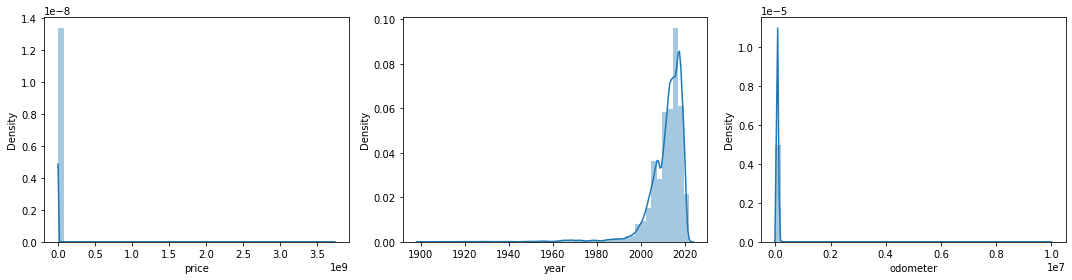

In [86]:
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(1,3,figsize=(15,4))
for variable,subplots in zip(df_num.columns,ax.flatten()):
    sns.distplot(df_num[variable],ax=subplots)
    plt.xlabel(variable)
    plt.tight_layout()
plt.show()

### inference:
data have extream outliers 

so we are treating it by using inter quartile range(iqr)

In [87]:
q1=df.quantile(0.10)
q3=df.quantile(0.95)
df=df[~((df<q1)|(df>q3)).any(axis=1)]

In [88]:
# q1=df.quantile(0.25)
# q3=df.quantile(0.75)
# iqr=q3-q1
# l1=q1-(1.5*iqr)
# u1=q3+(1.5*iqr)
# df=df[~((df<l1)|(df>u1)).any(axis=1)]

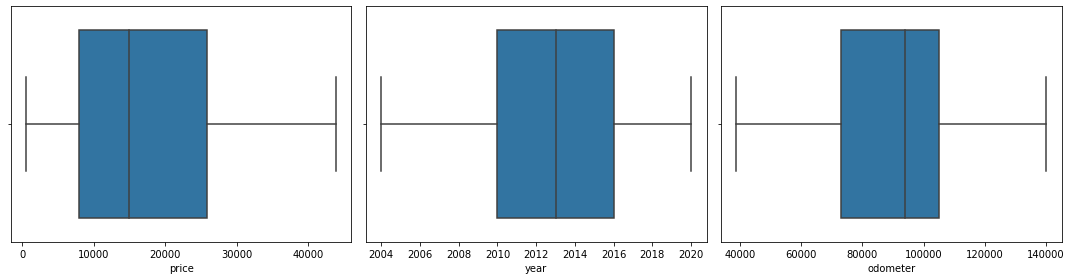

In [89]:
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(1,3,figsize=(15,4))
for variable,subplots in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplots)
    plt.xlabel(variable)
    plt.tight_layout()
plt.show()

In [90]:
df.shape

(193568, 16)

In [91]:
df.describe()

,price,year,odometer,lat,long
count,193568.000000,193568.000000,193568.000000,193568.000000,193568.000000
mean,17511.332193,2013.012042,89915.714669,38.503022,-90.519401
std,10900.676808,4.211930,22912.426098,4.023325,13.754455
min,569.000000,2004.000000,38843.000000,30.330000,-121.269730
25%,7999.000000,2010.000000,73011.000000,35.060000,-96.310000
50%,15000.000000,2013.000000,93781.000000,38.990868,-85.650000
75%,25900.000000,2016.000000,105000.000000,41.660000,-80.550000
max,43900.000000,2020.000000,140000.000000,46.590185,-72.900000


### Inference 
after treating the null values the data is near to normal

## Univariate numerical analysis

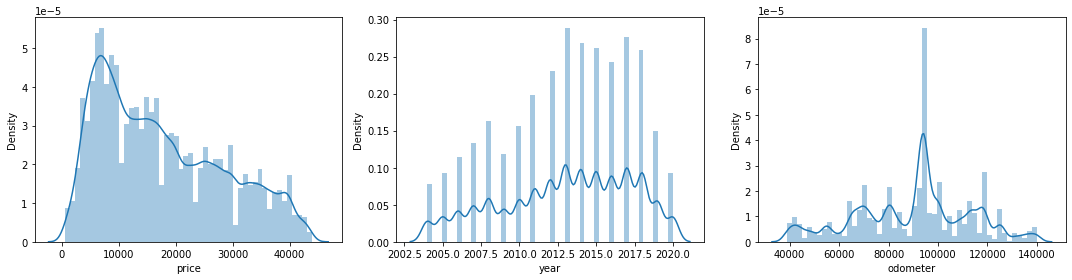

In [92]:
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(1,3,figsize=(15,4))
for variable,subplots in zip(df_num.columns,ax.flatten()):
    sns.distplot(df_num[variable],ax=subplots)
    plt.xlabel(variable)
    plt.tight_layout()
plt.show()

In [93]:
df.describe()

,price,year,odometer,lat,long
count,193568.000000,193568.000000,193568.000000,193568.000000,193568.000000
mean,17511.332193,2013.012042,89915.714669,38.503022,-90.519401
std,10900.676808,4.211930,22912.426098,4.023325,13.754455
min,569.000000,2004.000000,38843.000000,30.330000,-121.269730
25%,7999.000000,2010.000000,73011.000000,35.060000,-96.310000
50%,15000.000000,2013.000000,93781.000000,38.990868,-85.650000
75%,25900.000000,2016.000000,105000.000000,41.660000,-80.550000
max,43900.000000,2020.000000,140000.000000,46.590185,-72.900000


<AxesSubplot: xlabel='condition', ylabel='count'>

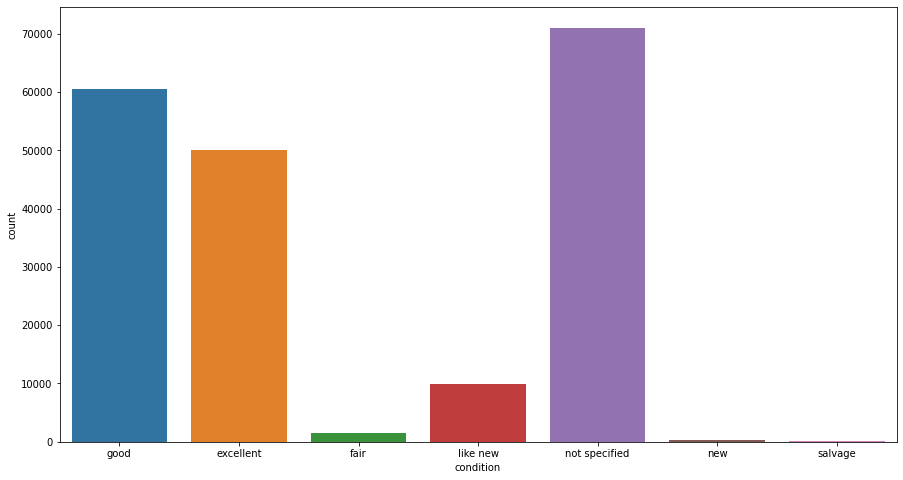

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(df['condition'])

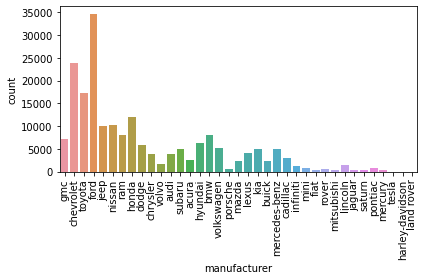

In [95]:
sns.countplot(df['manufacturer'])
plt.xticks(rotation=90)
plt.tight_layout()

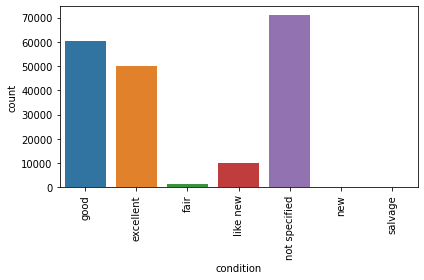

In [96]:
sns.countplot(df['condition'])
plt.xticks(rotation=90)
plt.tight_layout()

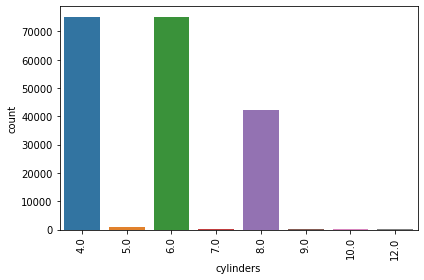

In [97]:
sns.countplot(df['cylinders'])
plt.xticks(rotation=90)
plt.tight_layout()

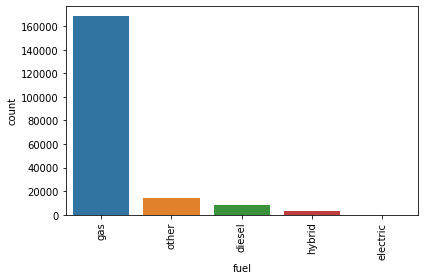

In [98]:
sns.countplot(df['fuel'])
plt.xticks(rotation=90)
plt.tight_layout()

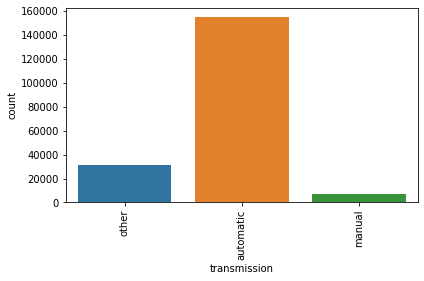

In [99]:
sns.countplot(df['transmission'])
plt.xticks(rotation=90)
plt.tight_layout()

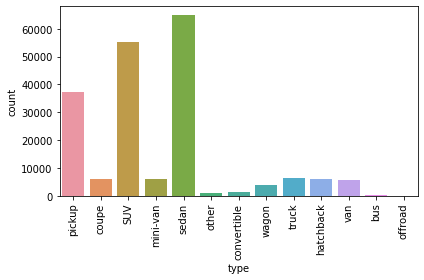

In [100]:
sns.countplot(df['type'])
plt.xticks(rotation=90)
plt.tight_layout()

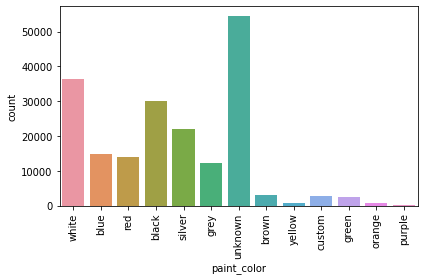

In [101]:
sns.countplot(df['paint_color'])
plt.xticks(rotation=90)
plt.tight_layout()

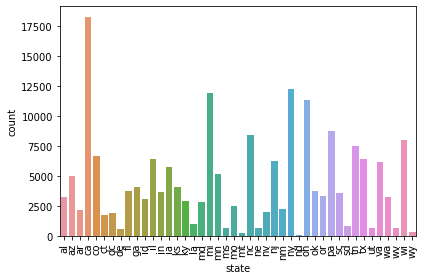

In [102]:
sns.countplot(df['state'])
plt.xticks(rotation=90)
plt.tight_layout()

## bivariate numerical analysis

<AxesSubplot: xlabel='year', ylabel='price'>

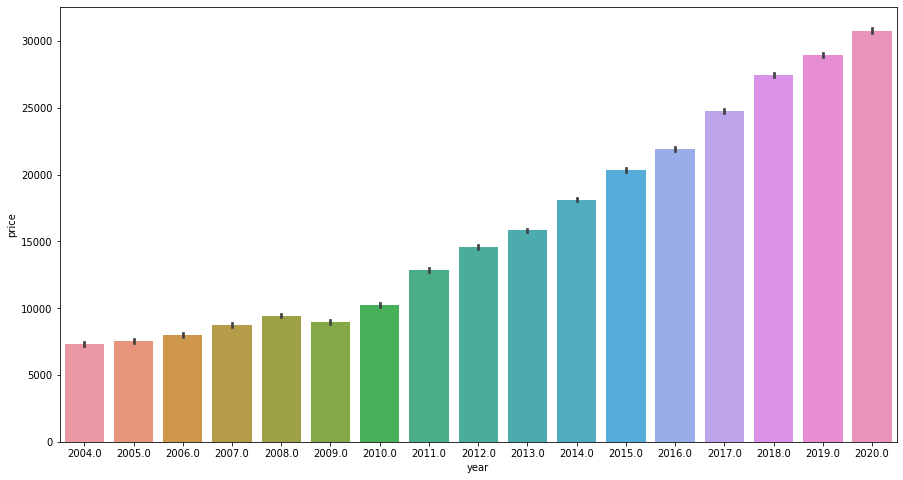

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['price'],x=df['year'])

<AxesSubplot: xlabel='odometer', ylabel='price'>

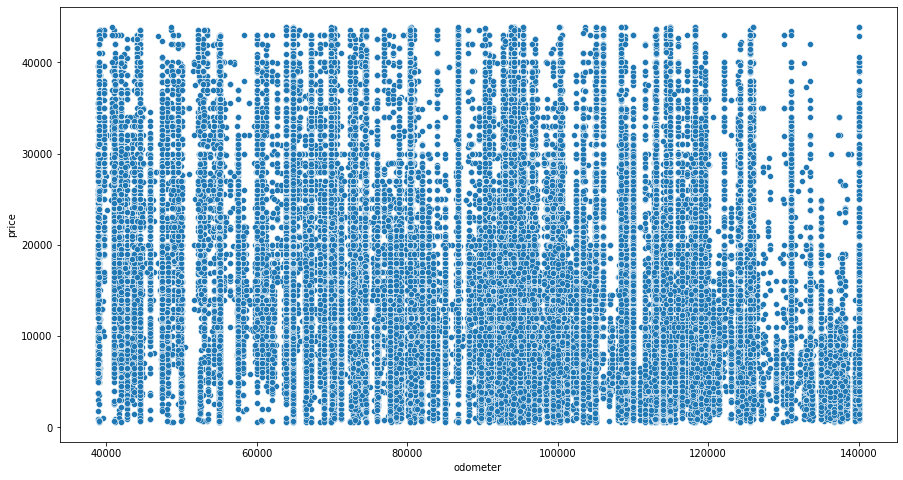

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['odometer'])

<AxesSubplot: xlabel='year', ylabel='odometer'>

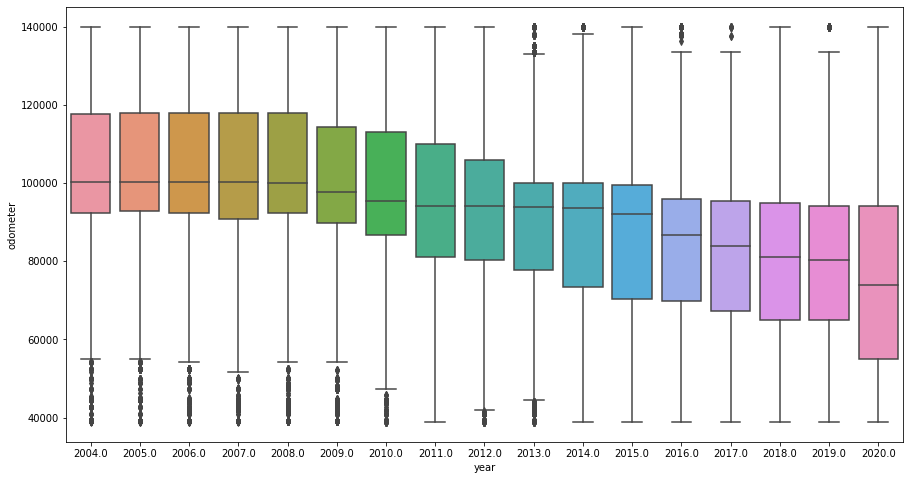

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['year'],y=df['odometer'])

In [106]:
#categorical bivariate analysis

<AxesSubplot: xlabel='manufacturer', ylabel='price'>

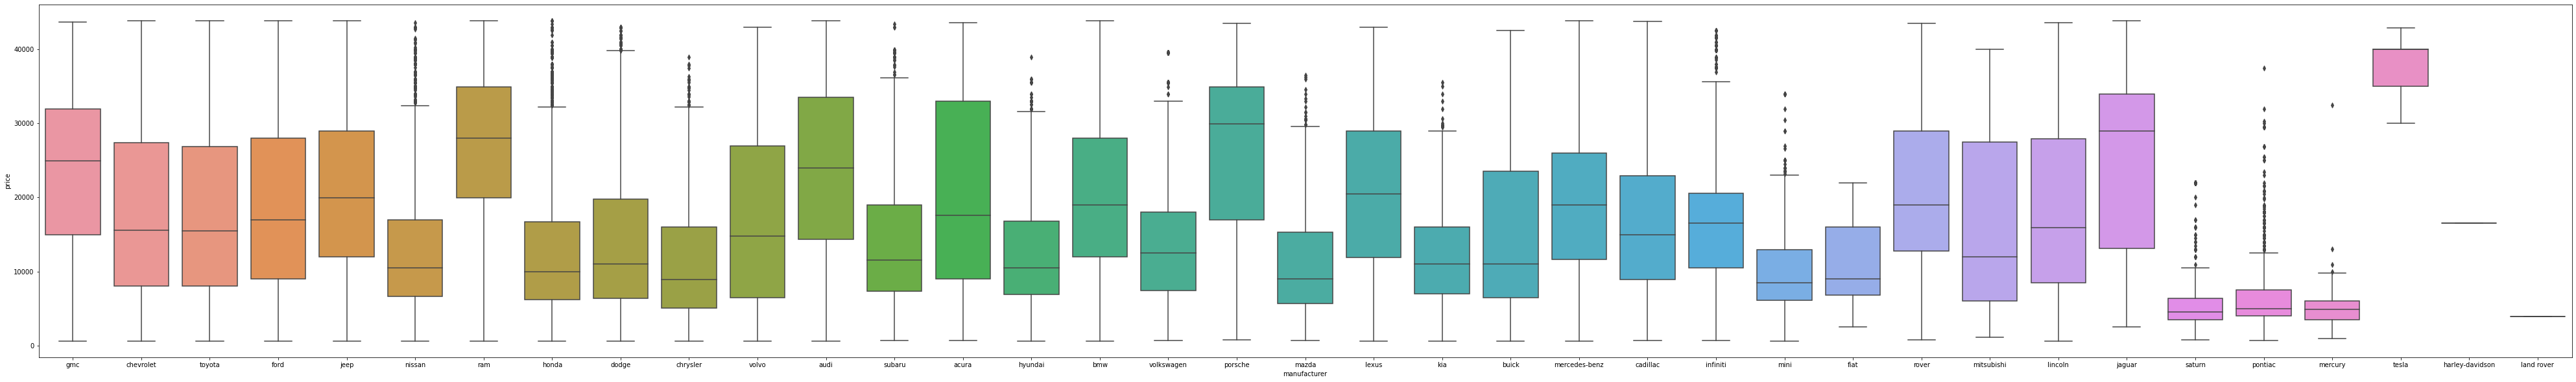

In [107]:
plt.figure(figsize=(70,10))
sns.boxplot(x=df['manufacturer'],y=df['price'])

<AxesSubplot: xlabel='year', ylabel='price'>

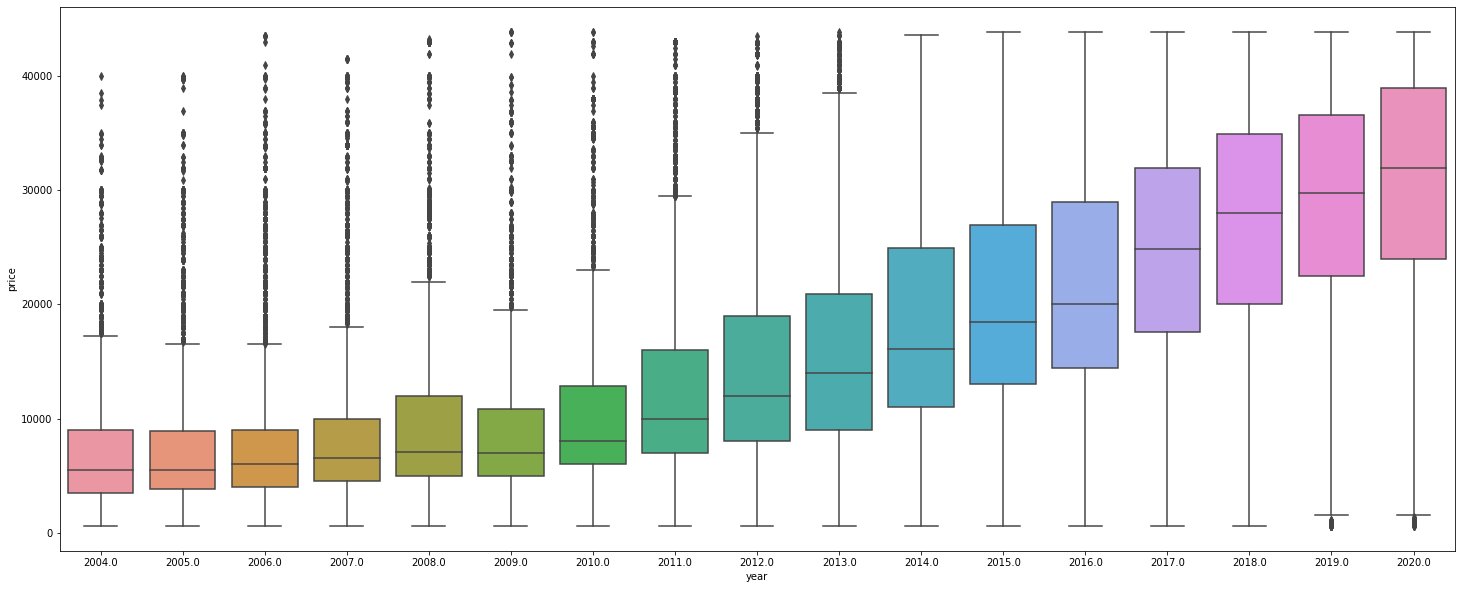

In [108]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['year'],y=df['price'])

<AxesSubplot: xlabel='condition', ylabel='price'>

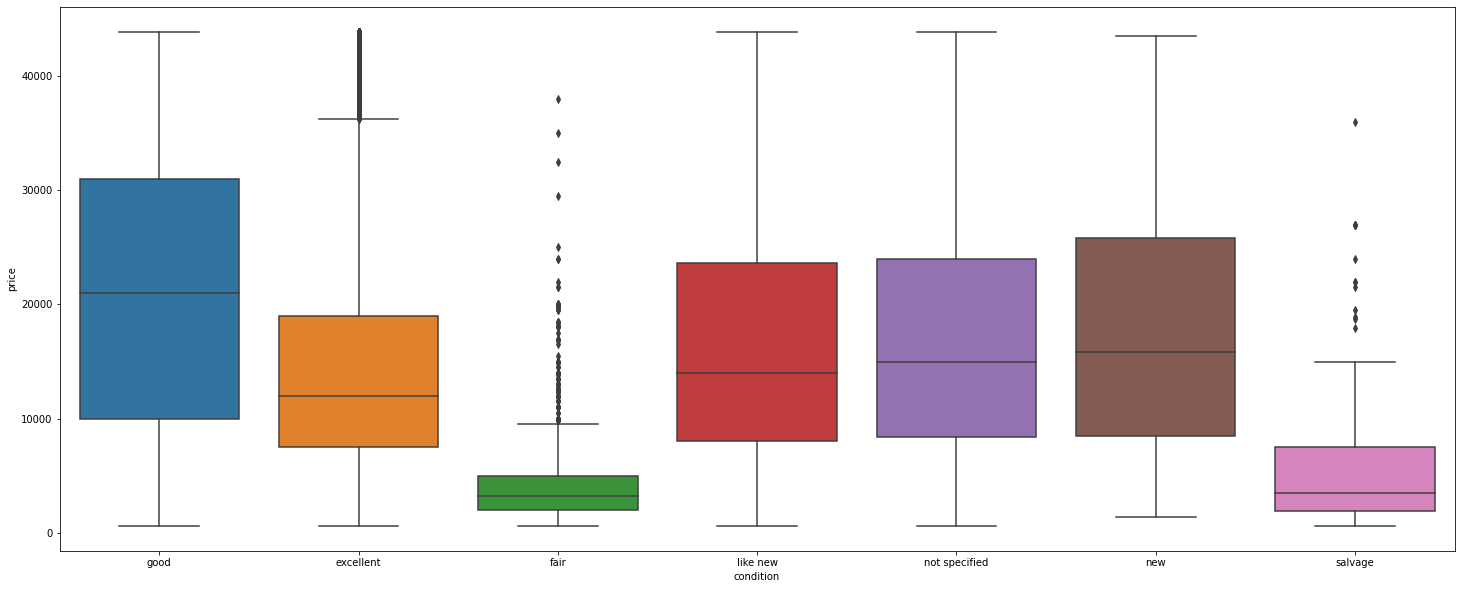

In [109]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['condition'],y=df['price'])

<AxesSubplot: xlabel='fuel', ylabel='price'>

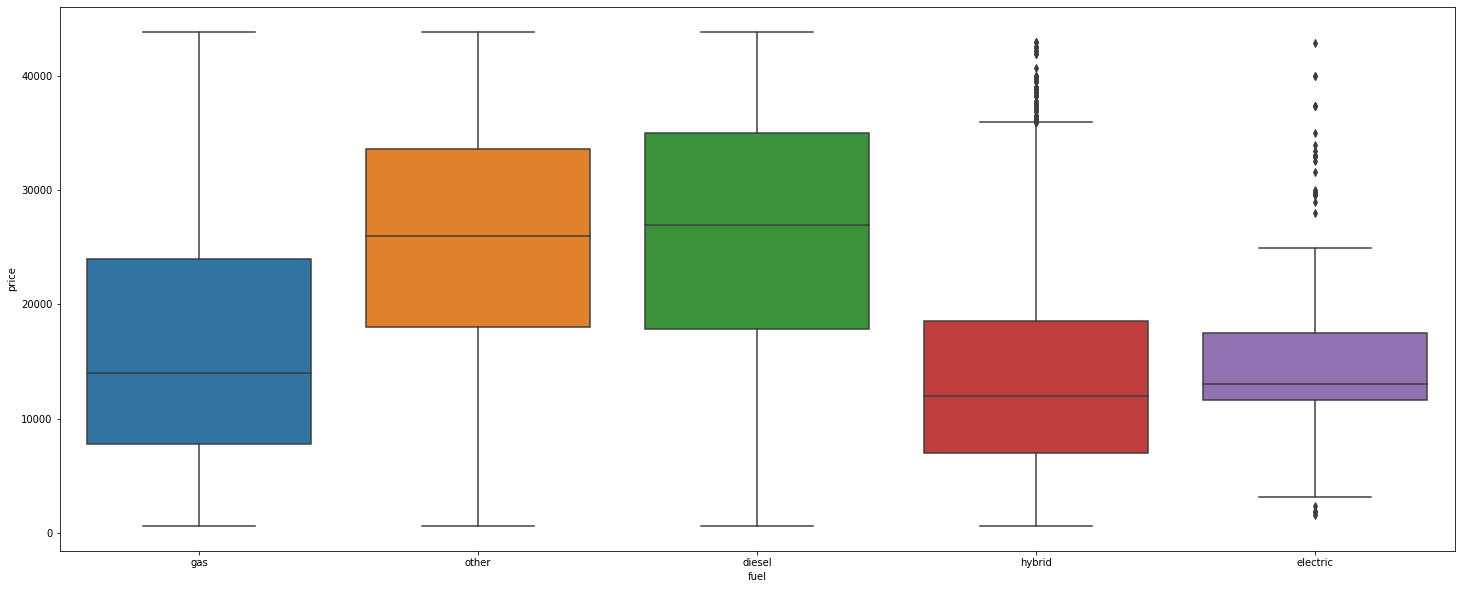

In [110]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['fuel'],y=df['price'])

<AxesSubplot: xlabel='cylinders', ylabel='price'>

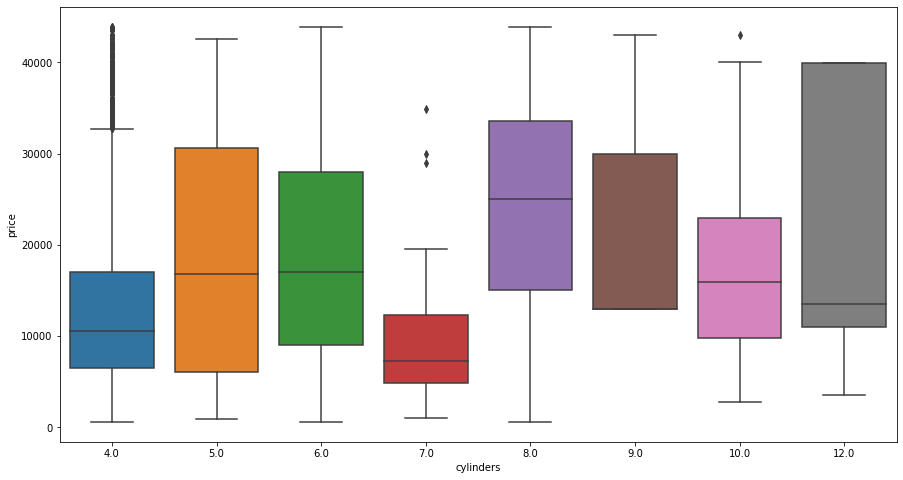

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(df['cylinders'],df['price'])

<AxesSubplot: xlabel='transmission', ylabel='price'>

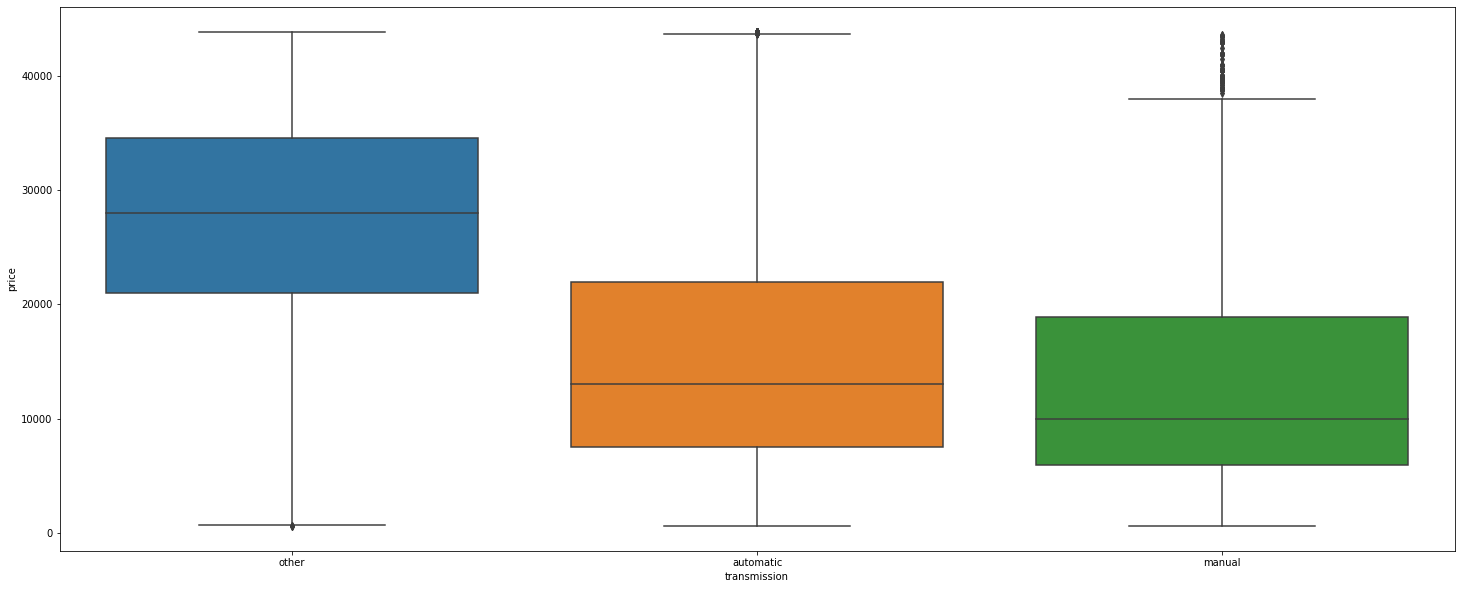

In [112]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['transmission'],y=df['price'])

<AxesSubplot: xlabel='drive', ylabel='price'>

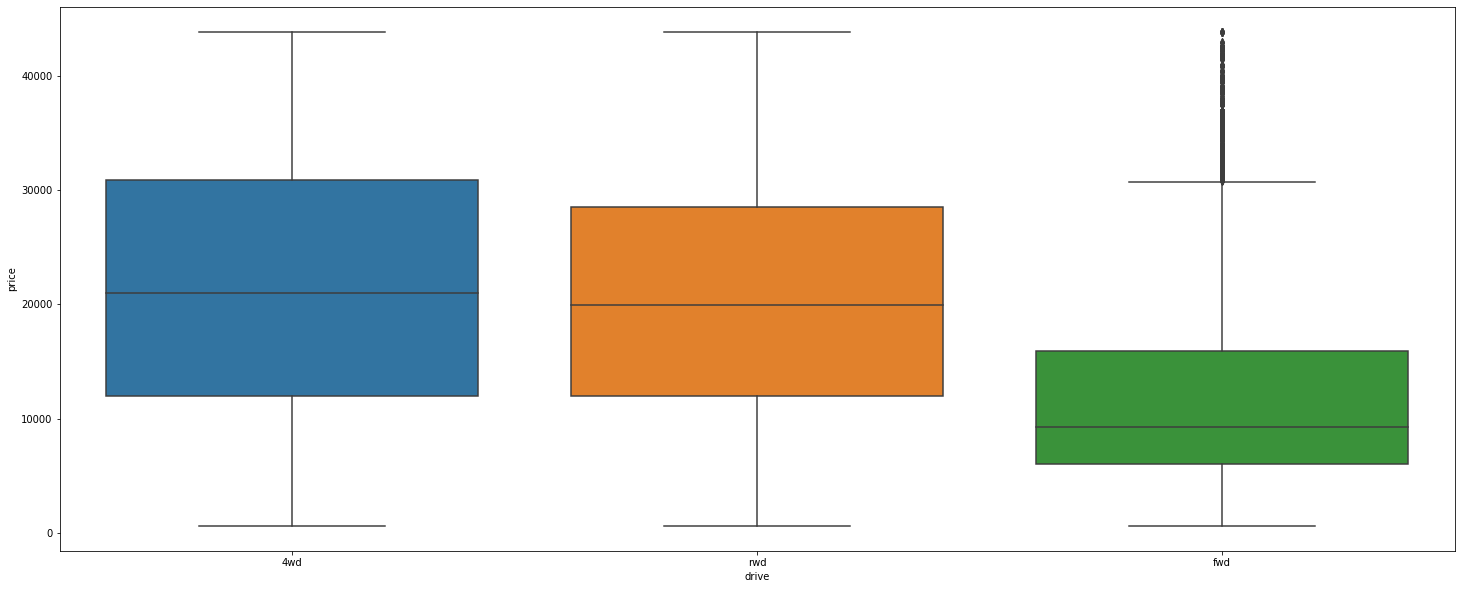

In [113]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['drive'],y=df['price'])

<AxesSubplot: xlabel='paint_color', ylabel='price'>

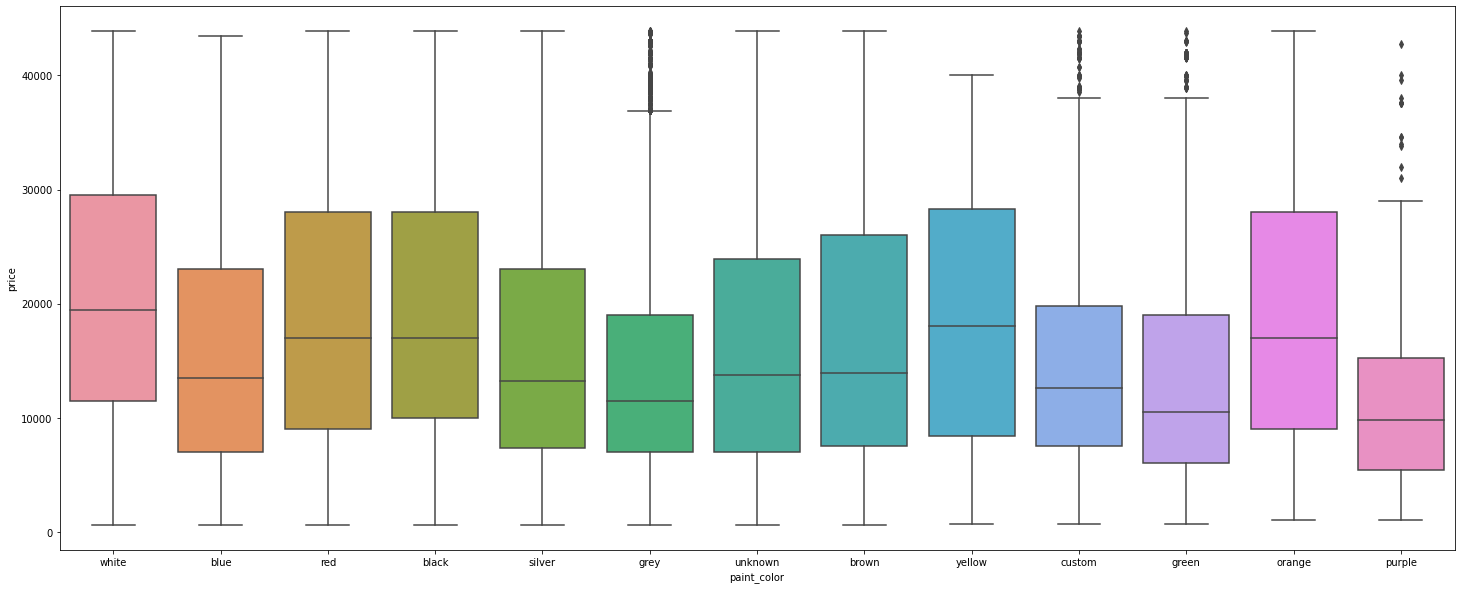

In [114]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['paint_color'],y=df['price'])

<AxesSubplot: xlabel='type', ylabel='price'>

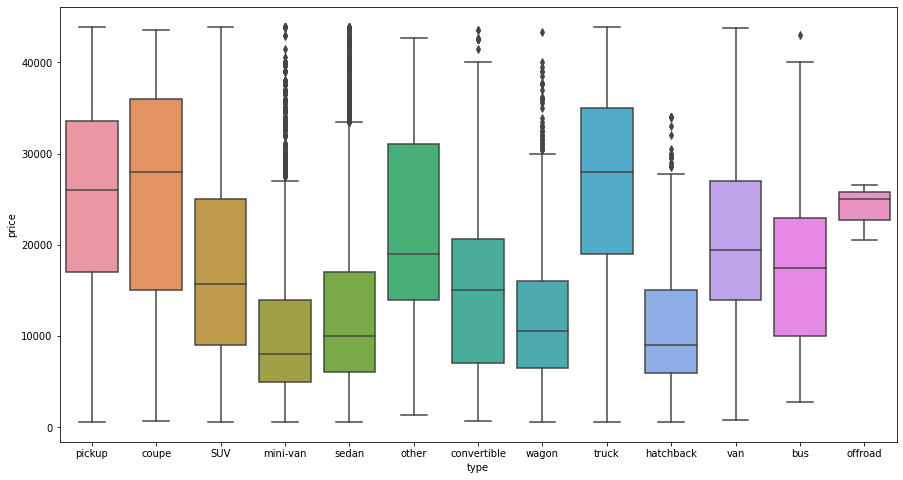

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(df['type'],df['price'])

In [116]:
df.drop(['lat','long'],axis=1,inplace=True)

In [117]:
df.drop('car_model',axis=1,inplace=True)

In [118]:
# Feature engineering

In [119]:
df['year'].unique()

array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       2018., 2004., 2015., 2006., 2008., 2005., 2007., 2009.])

In [120]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [121]:
regions_dict = {"state": ["al","ak","az","ar","ca","co","ct","de","dc","fl","ga","hi","id","il","in","ia",
                          "ks","ky","la","me","md","ma","mi","mn","ms","mo","mt","ne","nv","nh","nj","nm"
                          ,"ny","nc","nd","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","vt","va","wa",
                          "wv","wi","wy"], 
         "region": ["south","west","west","south","west","west","north-east","south",
                    "south","south","south","west","west","mid-west","mid-west","mid-west","mid-west","south",
                    "south","north-east","south","north-east","mid-west","mid-west","south","mid-west","west",
                    "mid-west","west","north-east","north-east","west","north-east","south","mid-west","mid-west",
                    "south","west","north-east","north-east","south","mid-west","south","south","west","north-east",
                    "south","west","south","mid-west","west"]}
dfState = pd.merge(df, pd.DataFrame(regions_dict), on = 'state', how = 'left').drop('state', axis = 1)
dfState

dfState.drop('region_x',axis=1,inplace=True)

dfState['region_y'].isnull().sum()

df=dfState.copy()

df.isnull().sum()

df=df.rename(columns={'region_y':'region'})

In [122]:
df['age'] = abs(df['year']-2023)

In [123]:
df['age']=df['age'].astype(int)

def func(x):
    if x<=10:
        return '1-10'
    if x>10 and x<=20:
        return '11-20'
    if x>20 and x<=30:
        return '21-30'
    if x>30 and x<=40:
        return '31-40'
    if x>40 and x<=50:
        return '41-50'
    if x>50 and x<=60:
        return '51-60'
    if x>60 and x<=70:
        return '61-70'
    if x>70 and x<=80:
        return '71-80'
    if x>80 and x<=90:
        return '81-90'
    if x>90 and x<=100:
        return '91-100'
    else:
        return '100+'

df['age cat']=df['age'].apply(func)

df

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,region,age,age cat
0,33590,2014.0,gmc,good,8.0,gas,80318.0,other,4wd,pickup,white,south,9,1-10
1,22590,2010.0,chevrolet,good,8.0,gas,94203.5,other,4wd,pickup,blue,south,13,11-20
2,39590,2020.0,chevrolet,good,8.0,gas,94203.5,other,4wd,pickup,red,south,3,1-10
3,30990,2017.0,toyota,good,8.0,gas,86765.0,other,4wd,pickup,red,south,6,1-10
4,15000,2013.0,ford,excellent,6.0,gas,93781.0,automatic,4wd,pickup,black,south,10,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193563,33590,2018.0,lexus,good,6.0,gas,72857.0,automatic,rwd,sedan,white,west,5,1-10
193564,23590,2019.0,nissan,good,6.0,gas,102374.0,other,fwd,sedan,unknown,west,4,1-10
193565,30590,2020.0,volvo,good,5.0,gas,42755.0,other,fwd,sedan,red,west,3,1-10
193566,28990,2018.0,lexus,good,6.0,gas,90286.0,other,fwd,sedan,silver,west,5,1-10


In [124]:
# df['Car Class'].value_counts()

In [125]:
df=df.rename(columns={'Car Class':'Car_Class','age cat':'age_cat'})

## Hypothesis testing

In [126]:
alpha=0.05
print('H0:The means of all groups are equal.')
print("H1: At least one group mean is different from the others.")
for i in df.drop(['price','odometer','age'],axis=1).columns:    
    groups = df.groupby(i)['price'].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups.values)
    print(i)
    print('F-statistic:', f_statistic)
    print('P-value:', p_value)
    # Make a decision
    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")
    print('-------------------------')

H0:The means of all groups are equal.
H1: At least one group mean is different from the others.
year
F-statistic: 8751.561923556152
P-value: 0.0
Reject the null hypothesis.
-------------------------
manufacturer
F-statistic: 877.8614862795522
P-value: 0.0
Reject the null hypothesis.
-------------------------
condition
F-statistic: 2343.4240442555088
P-value: 0.0
Reject the null hypothesis.
-------------------------
cylinders
F-statistic: 5861.0599160305355
P-value: 0.0
Reject the null hypothesis.
-------------------------
fuel
F-statistic: 3946.5598291871383
P-value: 0.0
Reject the null hypothesis.
-------------------------
transmission
F-statistic: 19789.983887466595
P-value: 0.0
Reject the null hypothesis.
-------------------------
drive
F-statistic: 23564.536604717767
P-value: 0.0
Reject the null hypothesis.
-------------------------
type
F-statistic: 5086.067589129634
P-value: 0.0
Reject the null hypothesis.
-------------------------
paint_color
F-statistic: 618.5127089007765
P-val

In [127]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'region',
       'age', 'age_cat'],
      dtype='object')

In [128]:
print('H0: the means of the two groups are equal.') 
print('H1: the means of the two groups are not equal.')
t_statistic, p_value = stats.ttest_ind(df['odometer'], df['price'])
print('T-statistic:', t_statistic)
print('P-value:', p_value)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

H0: the means of the two groups are equal.
H1: the means of the two groups are not equal.
T-statistic: 1255.4655254223512
P-value: 0.0
Reject the null hypothesis.


In [129]:
print('H0: the means of the two groups are equal.') 
print('H1: the means of the two groups are not equal.')
t_statistic, p_value = stats.ttest_ind(df['age'], df['price'])
print('T-statistic:', t_statistic)
print('P-value:', p_value)
# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

H0: the means of the two groups are equal.
H1: the means of the two groups are not equal.
T-statistic: -706.373978972337
P-value: 0.0
Reject the null hypothesis.


In [130]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [131]:
model = ols("price ~ condition", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [132]:
model = ols("price ~ cylinders", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [133]:
model = ols("price ~ fuel", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [134]:
model = ols('price ~ odometer', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [135]:
model = ols('price ~ transmission', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [136]:
model = ols('price ~ drive', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [137]:
model = ols('price ~ type', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [138]:
model = ols('price ~ paint_color', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [139]:
model = ols('price ~ region', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [140]:
model = ols('price ~ age', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [141]:
#variance inflation factor

In [142]:
df_numeric_features_vif = df[['odometer','age']]
df_numeric_features_vif.head()

,odometer,age
0,80318.0,9
1,94203.5,13
2,94203.5,3
3,86765.0,6
4,93781.0,10


In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,6.840231,odometer
1,6.840231,age


In [145]:
#hence we drop year and age

In [146]:
# df.drop('year',axis=1,inplace=True)
# df.drop('age',axis=1,inplace=True)

In [147]:
df_numeric_features_vif = df[['price','odometer']]
df_numeric_features_vif.head()

,price,odometer
0,33590,80318.0
1,22590,94203.5
2,39590,94203.5
3,30990,86765.0
4,15000,93781.0


In [148]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,2.588418,odometer
1,2.588418,price


In [149]:
#Linear regression model
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193568 entries, 0 to 193567
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         193568 non-null  int64  
 1   year          193568 non-null  float64
 2   manufacturer  193568 non-null  object 
 3   condition     193568 non-null  object 
 4   cylinders     193568 non-null  object 
 5   fuel          193568 non-null  object 
 6   odometer      193568 non-null  float64
 7   transmission  193568 non-null  object 
 8   drive         193568 non-null  object 
 9   type          193568 non-null  object 
 10  paint_color   193568 non-null  object 
 11  region        193568 non-null  object 
 12  age           193568 non-null  int32  
 13  age_cat       193568 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(10)
memory usage: 21.4+ MB


# Model Building

In [225]:
rmse_list = []
mse_list = []
r2_list = []

In [226]:
# change the datatype of column A to int
df['year'] = df['year'].astype(int)

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.metrics import classification_report

X=df.drop(['price'],axis=1)
y = df['price']
y=list(y)
X=pd.get_dummies(X)
X=sma.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)
model=sma.OLS(ytrain,xtrain).fit()
model.summary()

NameError: name 'df' is not defined

In [228]:
y_pred_prob = model.predict(xtest)
y_pred = (y_pred_prob >= 0.5).astype(int)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, y_pred_prob)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred_prob)
print('mse:',mse,'\nrmse:',rmse,'\nr2:',r2)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)

mse: 30542077.199821174 
rmse: 5526.488686301744 
r2: 0.7421268096558653


In [229]:
dw = sm.stats.stattools.durbin_watson(model.resid)
print('Durbin-Watson test statistic:', dw)

Durbin-Watson test statistic: 1.9986868616783384


In [230]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
bp = het_breuschpagan(model.resid, xtrain)
print('Breusch-Pagan test statistic:', bp[0])
print('Breusch-Pagan p-value:', bp[1])

Breusch-Pagan test statistic: 12725.790919740215
Breusch-Pagan p-value: 0.0


In [231]:
from scipy.stats import shapiro
sw = shapiro(model.resid)
print('Shapiro-Wilk test statistic:', sw[0])
print('Shapiro-Wilk p-value:', sw[1])

Shapiro-Wilk test statistic: 0.9724714159965515
Shapiro-Wilk p-value: 0.0


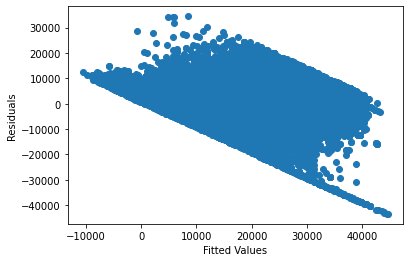

In [232]:
plt.scatter(model.predict(xtrain), model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

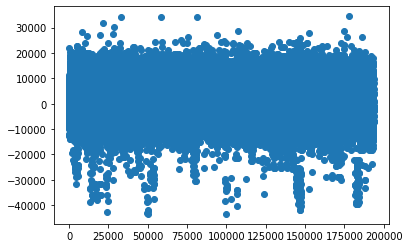

In [233]:
plt.plot(model.resid,'o')
plt.show()

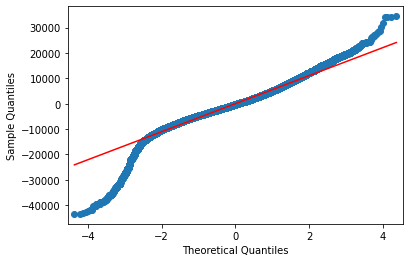

In [234]:
sm.qqplot(model.resid, line='s')
plt.show()

# desision tree

In [235]:
from sklearn.tree import DecisionTreeRegressor

In [236]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [237]:
# Predict the target variable for the training data
y_train_pred_dt = dt.predict(xtrain)

# Calculate the RMSE and MSE
mse = mean_squared_error(ytrain, y_train_pred_dt)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytrain, y_train_pred_dt)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  4572435.432693296
RMSE:  2138.3253804538954
R2 score:  0.9615502480238499


In [238]:
# Predict the target variable for the testing data
y_pred = dt.predict(xtest)

# Calculate the RMSE and MSE
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytest, y_pred)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  16388159.645364907
RMSE:  4048.229198719473
R2 score:  0.8616313165614029


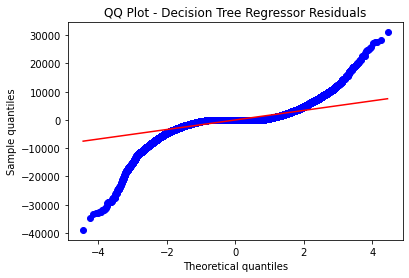

In [239]:
y_pred = dt.predict(xtrain)

# Generate QQ plot
residuals = ytrain - y_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

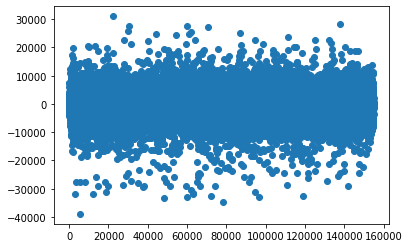

In [240]:
plt.plot(residuals,'o')
plt.show()

## hyper parameter tuning for Decision tree regressor

In [165]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# create the Decision Tree Regressor model
dt = DecisionTreeRegressor()

# create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(xtrain, xtrain)

# print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [241]:
dt = DecisionTreeRegressor(max_depth=8,max_features='auto',min_samples_leaf=1,min_samples_split=4)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=4)

In [242]:
# Predict the target variable for the training data
y_train_pred_dt = dt.predict(xtrain)

# Calculate the RMSE and MSE
mse = mean_squared_error(ytrain, y_train_pred_dt)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytrain, y_train_pred_dt)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  27067980.227933977
RMSE:  5202.689710902811
R2 score:  0.7723845111474084


In [243]:
y_test_pred_dt = dt.predict(xtest)

# Calculate the RMSE and MSE
mse = mean_squared_error(ytest, y_test_pred_dt)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytest, y_test_pred_dt)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)

MSE:  27331909.53887069
RMSE:  5227.992878617059
R2 score:  0.7692309313190021


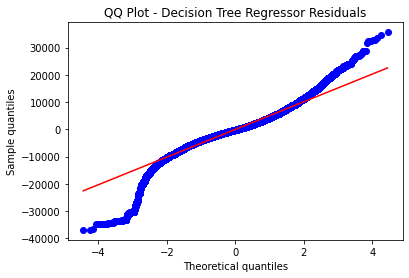

In [244]:
y_pred = dt.predict(xtrain)

# Generate QQ plot
residuals = ytrain - y_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# KNN

In [178]:
from sklearn.neighbors import KNeighborsRegressor

In [179]:
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the regressor to the training data
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [180]:
y_train_pred_knn=knn.predict(xtrain)
mse = mean_squared_error(ytrain, y_train_pred_knn)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytrain, y_train_pred_knn)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  10272573.861384274
RMSE:  3205.085624657206
R2 score:  0.9136176064285605


In [245]:

y_test_pred_knn=knn.predict(xtest)

mse = mean_squared_error(ytest, y_test_pred_knn)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytest, y_test_pred_knn)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  15059023.447647879
RMSE:  3880.59575937096
R2 score:  0.8728534934115475


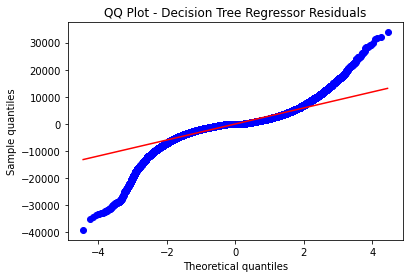

In [182]:
residuals = ytrain - y_train_pred_knn
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

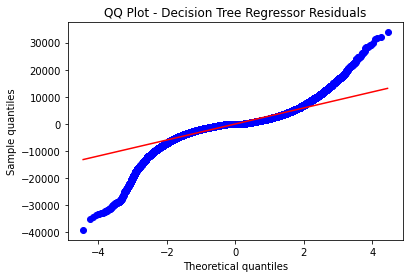

In [183]:


# Generate QQ plot
residuals = ytrain - y_train_pred_knn
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

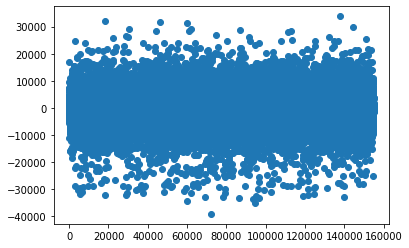

In [184]:
plt.plot(residuals,'o')
plt.show()

# random forest

In [246]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(xtrain,ytrain)

regressor.score(xtest,ytest)*100

89.20550762320353

In [198]:
y_train_pred_rf=regressor.predict(xtrain)
mse = mean_squared_error(ytrain, y_train_pred_rf)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytrain, y_train_pred_rf)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  17152536.295465298
RMSE:  4141.562059835069
R2 score:  0.8557637880226814


In [247]:
y_test_pred_rf=regressor.predict(xtest)

mse = mean_squared_error(ytest, y_test_pred_rf)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytest, y_test_pred_rf)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  12784819.510125456
RMSE:  3575.5865966475285
R2 score:  0.8920550762320353


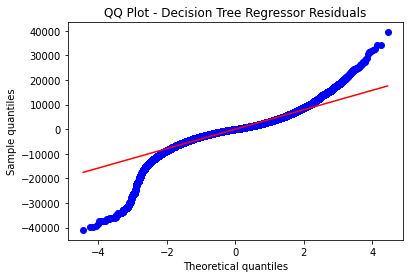

In [200]:
residuals = ytrain - y_train_pred_rf
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

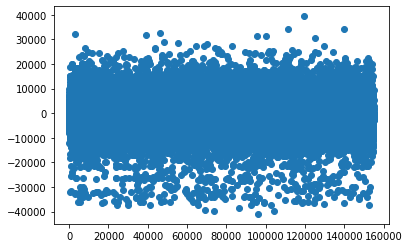

In [201]:
plt.plot(residuals,'o')
plt.show()

<AxesSubplot: xlabel='Importance', ylabel='Features'>

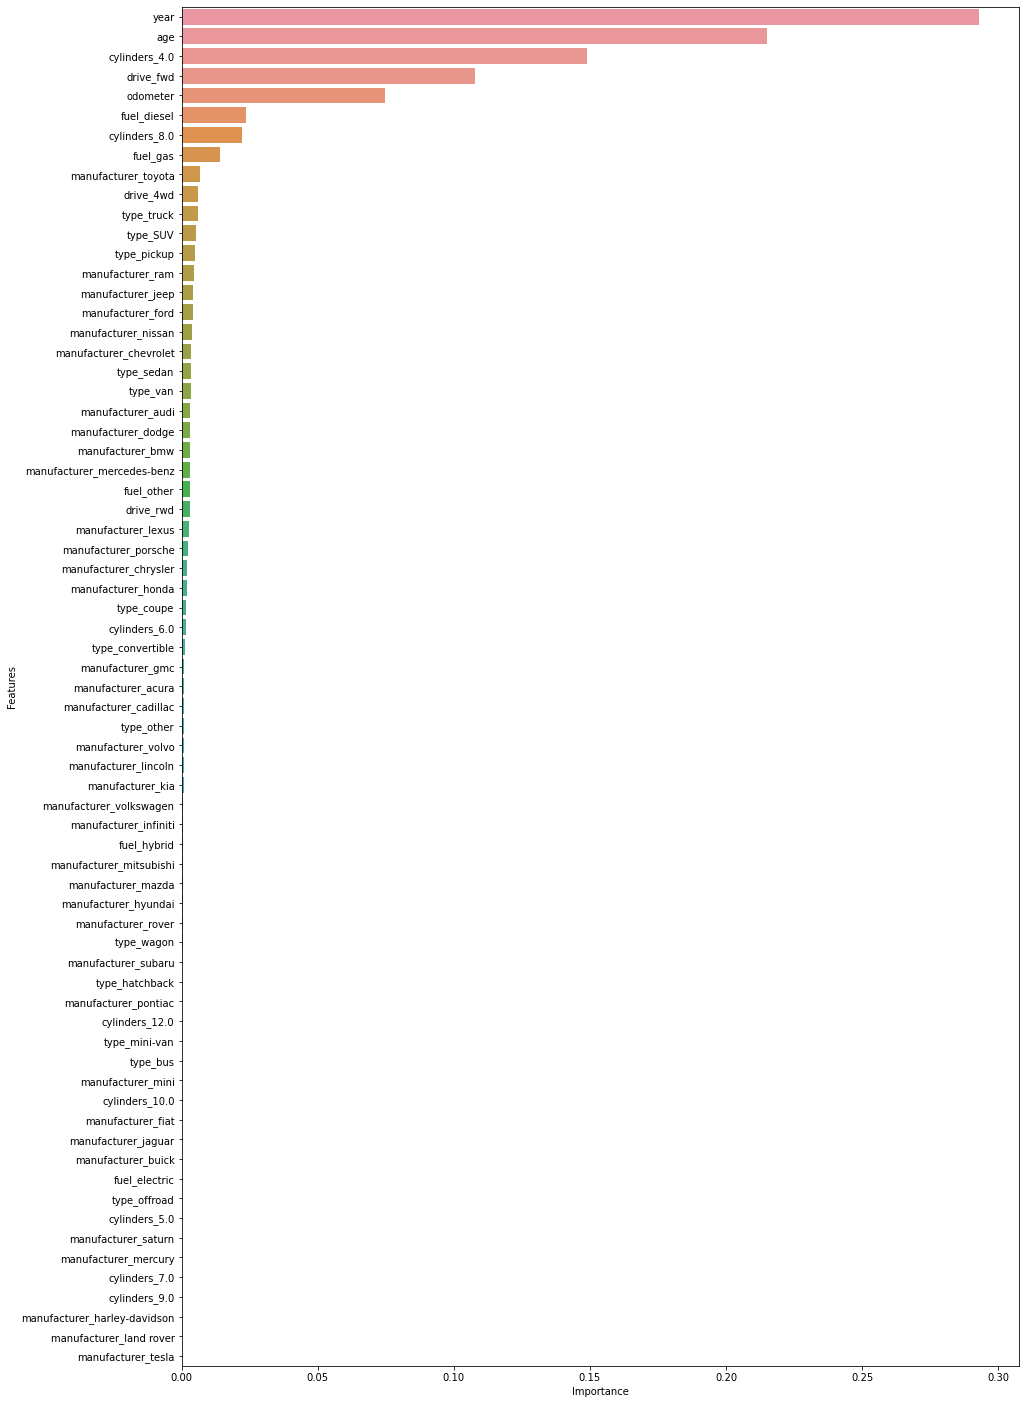

In [202]:
plt.figure(figsize=(15,25))
imp_feature=pd.DataFrame({'Features':xtrain.columns,'Importance':regressor.feature_importances_})
imp_feature=imp_feature.sort_values('Importance',ascending=False)
sns.barplot(data=imp_feature,x='Importance',y='Features')

In [203]:
imp_feature.T

,0,1,3,12,2,14,7,16,66,11,29,19,27,61,48,41,58,37,28,30,33,39,34,54,18,13,51,60,38,44,22,5,21,42,32,36,26,68,52,49,67,46,17,57,53,45,62,31,64,23,59,10,24,20,56,9,40,47,35,15,25,4,63,55,6,8,43,50,65
Features,year,age,cylinders_4.0,drive_fwd,odometer,fuel_diesel,cylinders_8.0,fuel_gas,manufacturer_toyota,drive_4wd,type_truck,type_SUV,type_pickup,manufacturer_ram,manufacturer_jeep,manufacturer_ford,manufacturer_nissan,manufacturer_chevrolet,type_sedan,type_van,manufacturer_audi,manufacturer_dodge,manufacturer_bmw,manufacturer_mercedes-benz,fuel_other,drive_rwd,manufacturer_lexus,manufacturer_porsche,manufacturer_chrysler,manufacturer_honda,type_coupe,cylinders_6.0,type_convertible,manufacturer_gmc,manufacturer_acura,manufacturer_cadillac,type_other,manufacturer_volvo,manufacturer_lincoln,manufacturer_kia,manufacturer_volkswagen,manufacturer_infiniti,fuel_hybrid,manufacturer_mitsubishi,manufacturer_mazda,manufacturer_hyundai,manufacturer_rover,type_wagon,manufacturer_subaru,type_hatchback,manufacturer_pontiac,cylinders_12.0,type_mini-van,type_bus,manufacturer_mini,cylinders_10.0,manufacturer_fiat,manufacturer_jaguar,manufacturer_buick,fuel_electric,type_offroad,cylinders_5.0,manufacturer_saturn,manufacturer_mercury,cylinders_7.0,cylinders_9.0,manufacturer_harley-davidson,manufacturer_land rover,manufacturer_tesla
Importance,0.292802,0.2152,0.148881,0.107902,0.074749,0.023623,0.022307,0.014285,0.006719,0.006114,0.006069,0.005352,0.005079,0.004391,0.004051,0.00403,0.00379,0.003586,0.003527,0.003358,0.003201,0.003161,0.003159,0.003145,0.003133,0.003024,0.00262,0.002308,0.001936,0.00187,0.001719,0.001461,0.001308,0.001054,0.001031,0.001029,0.000965,0.000801,0.000779,0.000729,0.000649,0.000512,0.000507,0.000443,0.00042,0.000411,0.000378,0.000343,0.000333,0.000332,0.0002,0.000198,0.000183,0.000151,0.000141,0.000103,0.000096,0.000086,0.000085,0.00007,0.000028,0.000024,0.000018,0.000015,0.000013,0.000007,0.000006,0.000001,0.0


In [204]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,region,age,age_cat
0,33590,2014,gmc,good,8.0,gas,80318.0,other,4wd,pickup,white,south,9,1-10
1,22590,2010,chevrolet,good,8.0,gas,94203.5,other,4wd,pickup,blue,south,13,11-20
2,39590,2020,chevrolet,good,8.0,gas,94203.5,other,4wd,pickup,red,south,3,1-10
3,30990,2017,toyota,good,8.0,gas,86765.0,other,4wd,pickup,red,south,6,1-10
4,15000,2013,ford,excellent,6.0,gas,93781.0,automatic,4wd,pickup,black,south,10,1-10


In [248]:
col=['price','year','age','cylinders','drive','odometer','fuel','type','manufacturer']
df_new=df[col]
df_new.head()

,price,year,age,cylinders,drive,odometer,fuel,type,manufacturer
0,33590,2014,9,8.0,4wd,80318.0,gas,pickup,gmc
1,22590,2010,13,8.0,4wd,94203.5,gas,pickup,chevrolet
2,39590,2020,3,8.0,4wd,94203.5,gas,pickup,chevrolet
3,30990,2017,6,8.0,4wd,86765.0,gas,pickup,toyota
4,15000,2013,10,6.0,4wd,93781.0,gas,pickup,ford


In [249]:
X=df_new.drop(['price'],axis=1)
y = df_new['price']
y=list(y)
X=pd.get_dummies(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [250]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(xtrain,ytrain)

regressor.score(xtrain,ytrain)*100

85.57637880226814

In [251]:
y_train_pred_rf=regressor.predict(xtrain)
y_test_pred_rf=regressor.predict(xtest)

mse = mean_squared_error(ytest, y_test_pred_rf)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(ytest, y_test_pred_rf)
rmse_list.append(rmse)
mse_list.append(mse)
r2_list.append(r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)

MSE:  18829466.83827007
RMSE:  4339.293357019097
R2 score:  0.8410188457616687


In [ ]:
residuals = ytrain - y_train_pred_rf
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Decision Tree Regressor Residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

In [ ]:
##

In [211]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# create the Random Forest Regressor model
rf = RandomForestRegressor()

# create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(xtrain, ytrain)

# print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


KeyboardInterrupt



In [256]:
for i in range(len(rmse_list)): 
    rmse_list[i]=round(rmse_list[i],2)
    mse_list[i]=round(mse_list[i],2)
    r2_list[i]=round(r2_list[i],2)
rmse_list,mse_list,r2_list

([5526.49, 4048.23, 5227.99, 3880.6, 3575.59, 4339.29],
 [30542077.2, 16388159.65, 27331909.54, 15059023.45, 12784819.51, 18829466.84],
 [0.74, 0.86, 0.77, 0.87, 0.89, 0.84])

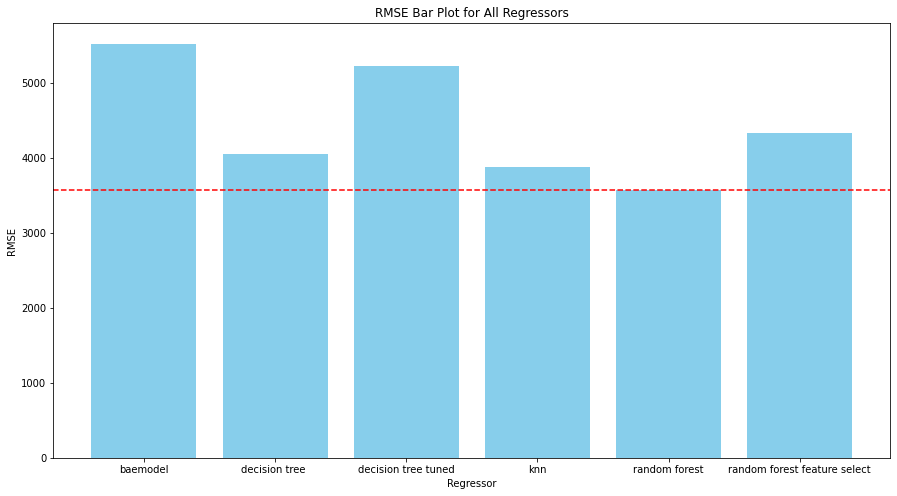

In [277]:
regressors = ['baemodel', 'decision tree ', 'decision tree tuned','knn', 'random forest','random forest feature select']

rmse_array = np.array(rmse_list)
plt.figure(figsize=(15,8))
# create the bar plot using matplotlib
plt.bar(regressors, rmse_array, color='skyblue')
max_rmse = np.min(rmse_array)
plt.axhline(y=max_rmse, color='red', linestyle='--', label='minimum RMSE')
# add titles and labels
plt.title('RMSE Bar Plot for All Regressors')
plt.xlabel('Regressor')
plt.ylabel('RMSE')

# show the plot
plt.show()

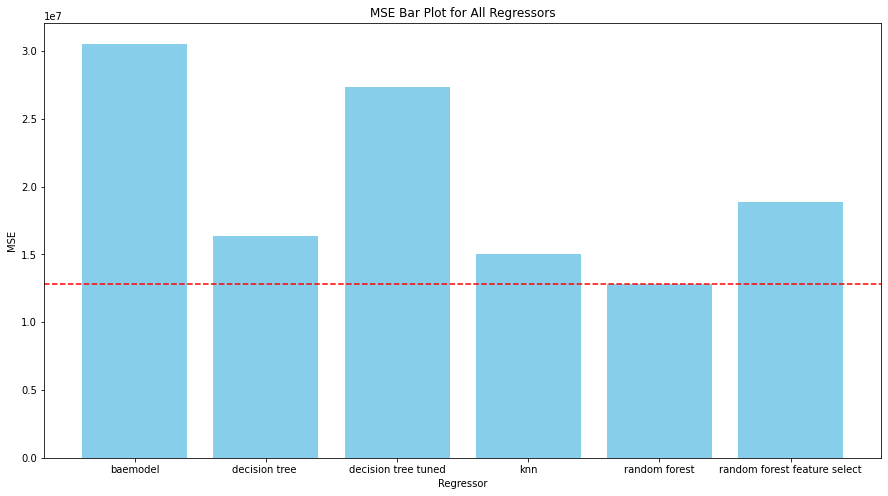

In [276]:
regressors = ['baemodel', 'decision tree ', 'decision tree tuned','knn', 'random forest','random forest feature select']

rmse_array = np.array(mse_list)
plt.figure(figsize=(15,8))
# create the bar plot using matplotlib
plt.bar(regressors, rmse_array, color='skyblue')
max_rmse = np.min(rmse_array)
plt.axhline(y=max_rmse, color='red', linestyle='--', label='minimum MSE')
# add titles and labels
plt.title('MSE Bar Plot for All Regressors')
plt.xlabel('Regressor')
plt.ylabel('MSE')

# show the plot
plt.show()

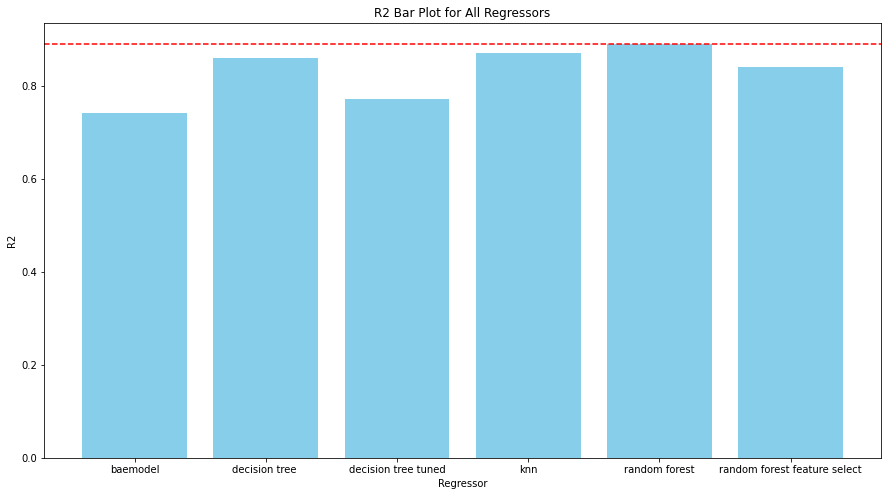

In [275]:
regressors = ['baemodel', 'decision tree ', 'decision tree tuned','knn', 'random forest','random forest feature select']

rmse_array = np.array(r2_list)
plt.figure(figsize=(15,8))
# create the bar plot using matplotlib
plt.bar(regressors, rmse_array, color='skyblue')
max_rmse = np.max(rmse_array)
plt.axhline(y=max_rmse, color='red', linestyle='--', label='Maximum RMSE')
# add titles and labels
plt.title('R2 Bar Plot for All Regressors')
plt.xlabel('Regressor')
plt.ylabel('R2')

# show the plot
plt.show()